In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import backend
import time

In [55]:

def _x(t,data):
    return 0 if t < 0 else data[t]

def x(t,data):
    beta = 0.2
    gamma = 0.1
    tau = 25
    n = 10
    return _x(t-1,data) + (beta*_x(t-tau-1,data))/(1+_x(t-tau-1,data)**n) - gamma*_x(t-1,data)

def mackey_glass_generator():


    N = 2000

    data = np.zeros(N)
    data[0] = 1.5

    for t in range(1,N):
        data[t] = x(t,data)

    return data
def get_train_test_data(x,addNoise=1,sigma=1):
    train_set = np.zeros([1000,5])
    train_labels = np.zeros([1000])
    
    for t in range(300,1300):
        train_set[t-300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        train_labels[t-300] = x[t+5] 

    test_set = np.zeros([200,5])
    test_labels = np.zeros([200])
    
    for t in range(1300,1500):
        test_set[t-1300,:] = [x[t-20], x[t-15], x[t-10], x[t-5], x[t]]
        test_labels[t-1300] = x[t+5] 
        
    if addNoise:
        noise = np.random.normal(0,sigma,train_set.shape)
        train_set = train_set+noise
        
    return train_set, train_labels, test_set, test_labels

def init_network(num_nodes, lambd):
    if len(num_nodes) < 1:
        return None

    model = Sequential()

    num_layers = len(num_nodes)
    model.add(Dense(num_nodes[0], input_dim=5, kernel_initializer='normal', activation='relu',use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    for i in range(1, num_layers):
        model.add(Dense(num_nodes[i], kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    model.add(Dense(1, kernel_initializer='normal', activation='relu', use_bias=True, activity_regularizer=regularizers.l2(lambd)))
    #not sparse data so we use L2 reg
    model.summary()
    sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='mse',metrics=['MSE'])
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, min_delta=0.001, patience=100)
    return model, es

In [56]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

Nodes hidden layer1:  8
Nodes hidden layer2:  2
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 00379: early stopping
[6.757383108139038]
Time taken:  6.757383108139038 s
MSE training: 0.0032007191
MSE val: 0.002554345177486539


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


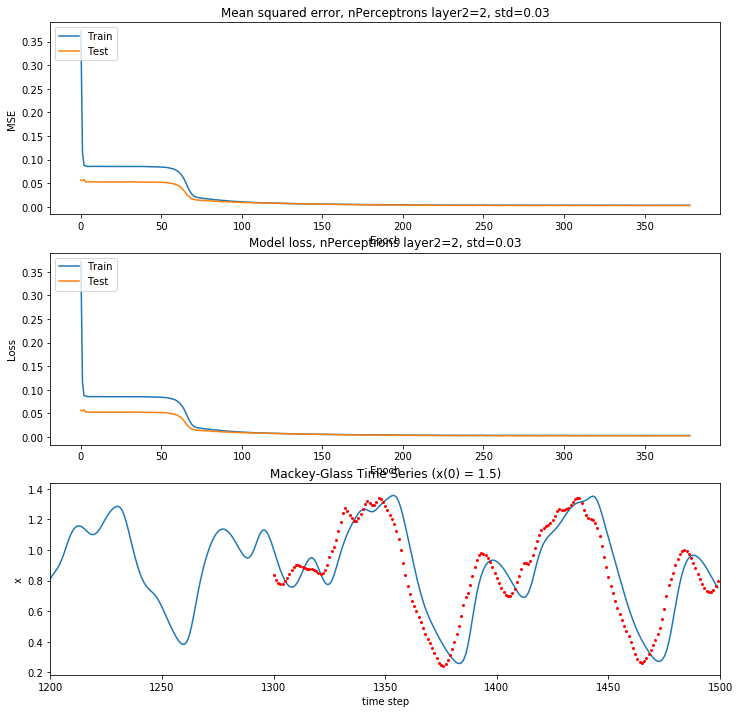

Nodes hidden layer1:  8
Nodes hidden layer2:  4
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 00321: early stopping
[6.757383108139038, 5.9428582191467285]
Time taken:  5.9428582191467285 s
MSE training: 0.003088985
MSE val: 0.0025295799132436514


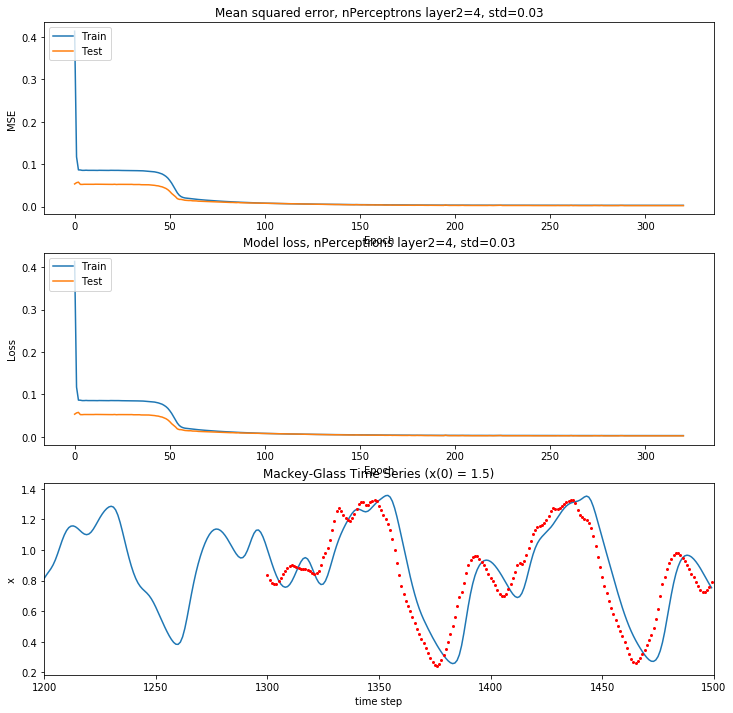

Nodes hidden layer1:  8
Nodes hidden layer2:  6
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
Epoch 00415: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744]
Time taken:  7.393240451812744 s
MSE training: 0.003159324
MSE val: 0.0028118491172790527


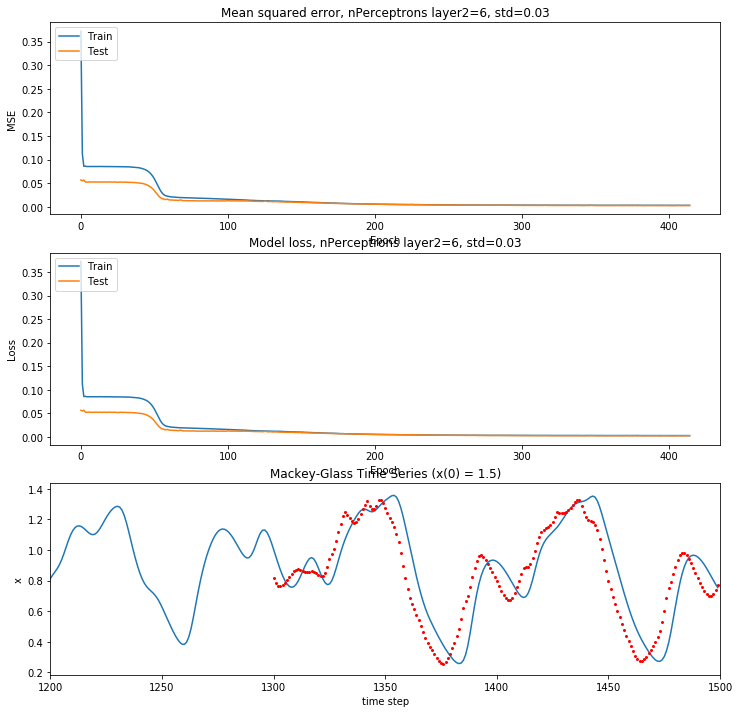

Nodes hidden layer1:  8
Nodes hidden layer2:  8
Noise added to training_set with std=0.03
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 00391: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143]
Time taken:  7.263973712921143 s
MSE training: 0.00297041
MSE val: 0.0026943995617330074


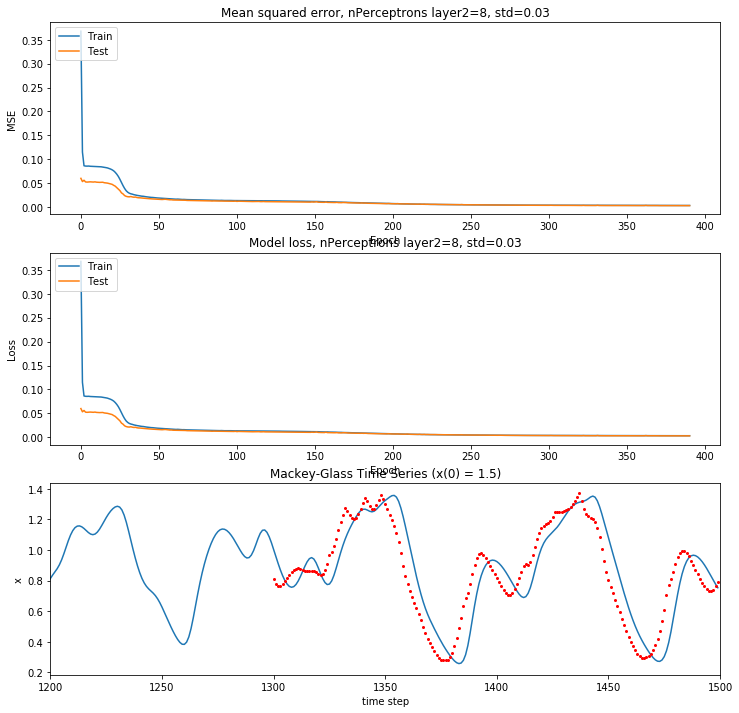

Nodes hidden layer1:  8
Nodes hidden layer2:  2
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
Epoch 00152: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464]
Time taken:  2.778956174850464 s
MSE training: 0.08556781
MSE val: 0.052775997668504715


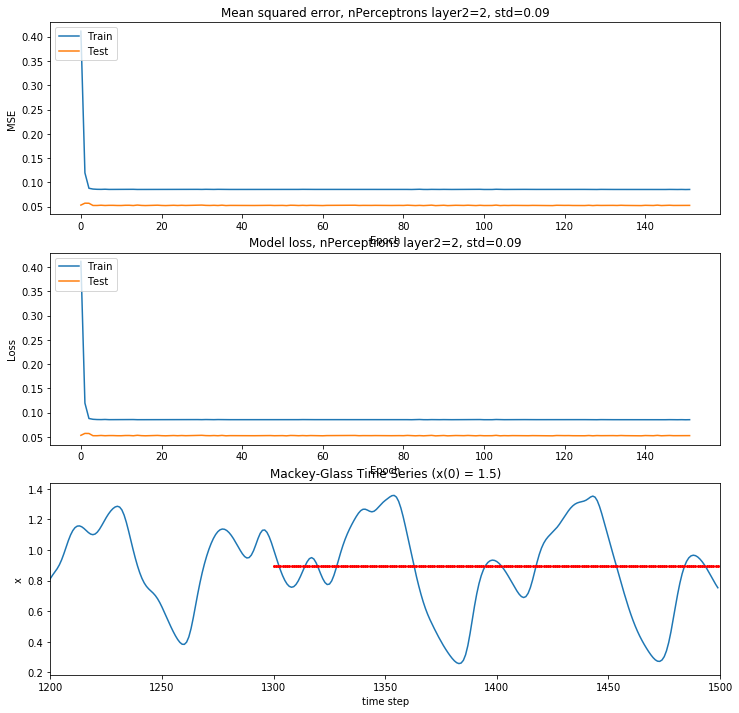

Nodes hidden layer1:  8
Nodes hidden layer2:  4
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378]
Time taken:  1.993260145187378 s
MSE training: 0.8934375
MSE val: 0.907838761806488


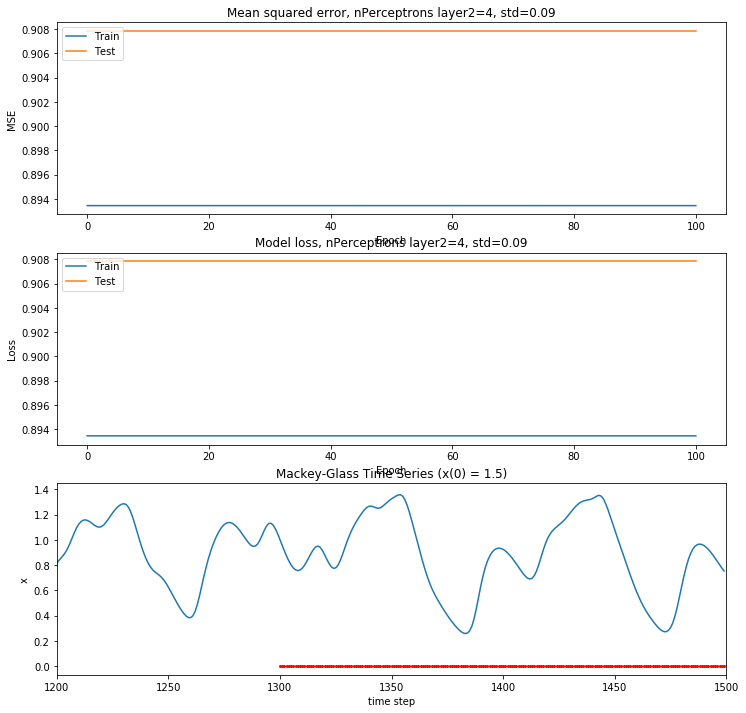

Nodes hidden layer1:  8
Nodes hidden layer2:  6
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
Epoch 00232: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275]
Time taken:  4.164000034332275 s
MSE training: 0.011268105
MSE val: 0.013072972185909748


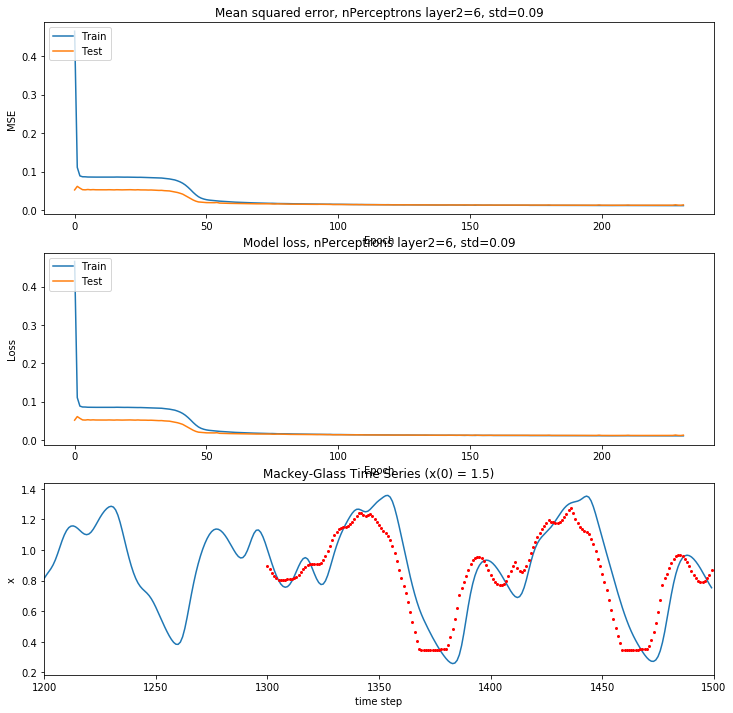

Nodes hidden layer1:  8
Nodes hidden layer2:  8
Noise added to training_set with std=0.09
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 00311: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275, 5.658883094787598]
Time taken:  5.658883094787598 s
MSE training: 0.01177515
MSE val: 0.012434086762368679


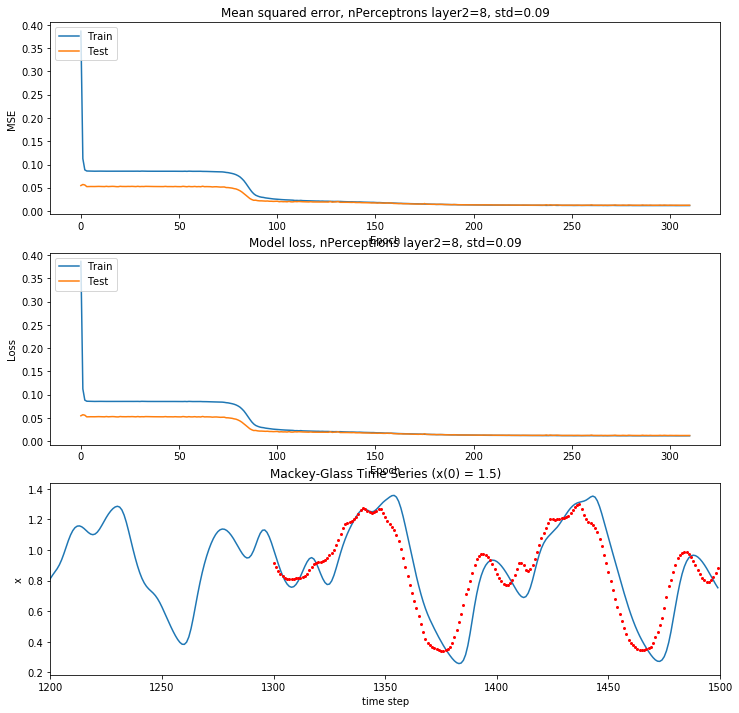

Nodes hidden layer1:  8
Nodes hidden layer2:  2
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275, 5.658883094787598, 2.0250349044799805]
Time taken:  2.0250349044799805 s
MSE training: 0.086157866
MSE val: 0.05275921896100044


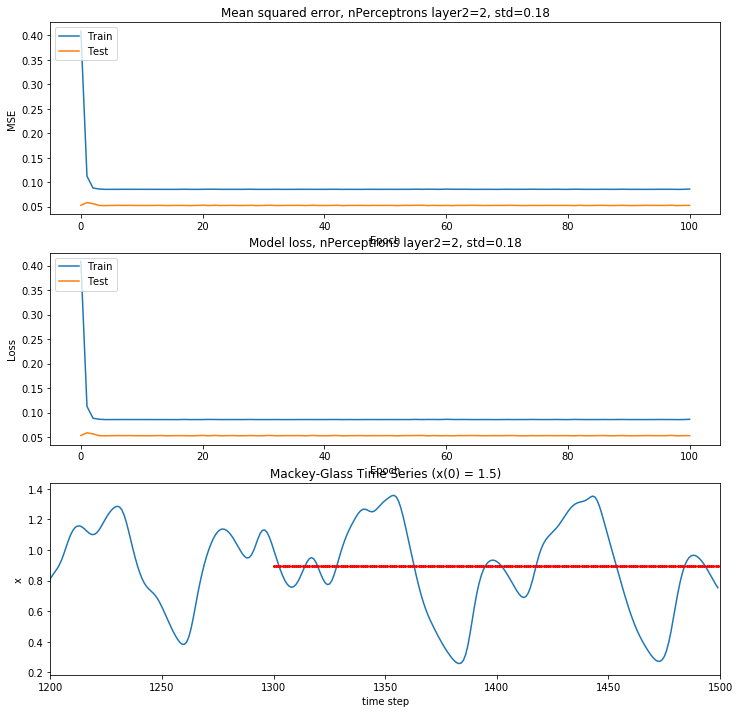

Nodes hidden layer1:  8
Nodes hidden layer2:  4
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 00192: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275, 5.658883094787598, 2.0250349044799805, 3.4101433753967285]
Time taken:  3.4101433753967285 s
MSE training: 0.024628185
MSE val: 0.02640

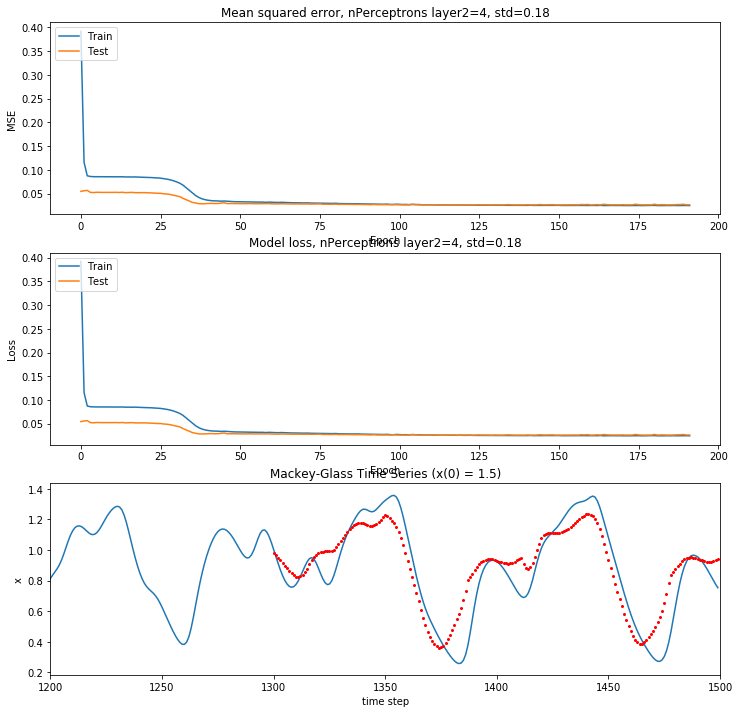

Nodes hidden layer1:  8
Nodes hidden layer2:  6
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
Epoch 00206: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275, 5.658883094787598, 2.0250349044799805, 3.4101433753967285, 3.6757760047912598]
Time taken:  3.6757760047912598 s
MSE training: 0.0241

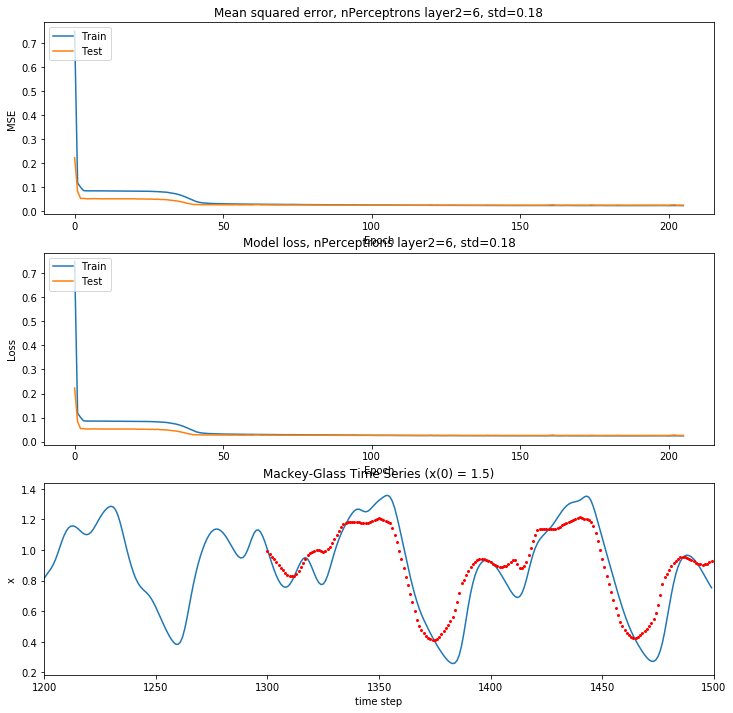

Nodes hidden layer1:  8
Nodes hidden layer2:  8
Noise added to training_set with std=0.18
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 00101: early stopping
[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275, 5.658883094787598, 2.0250349044799805, 3.4101433753967285, 3.6757760047912598, 1.8399474620819092]
Time taken:  1.8399474620819092 s


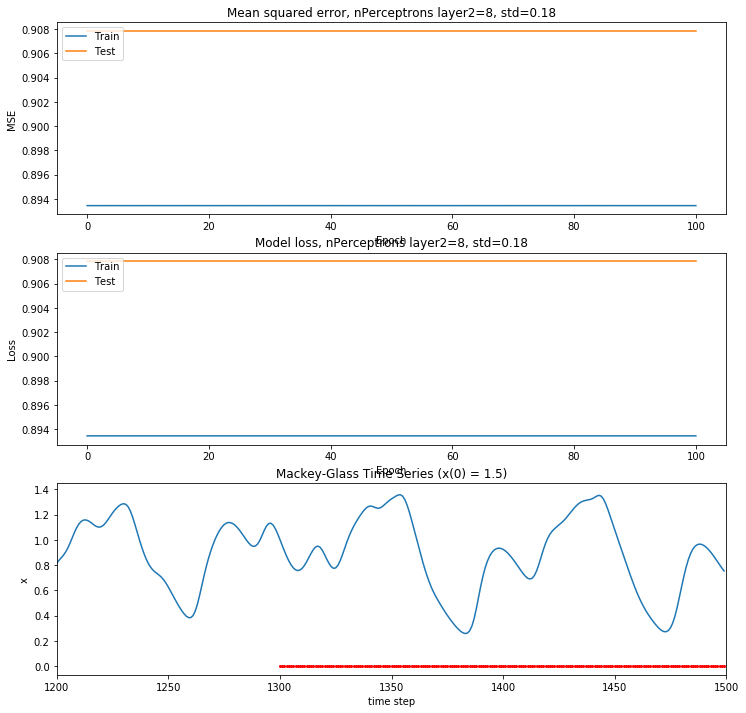

[6.757383108139038, 5.9428582191467285, 7.393240451812744, 7.263973712921143, 2.778956174850464, 1.993260145187378, 4.164000034332275, 5.658883094787598, 2.0250349044799805, 3.4101433753967285, 3.6757760047912598, 1.8399474620819092]


In [63]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))


nodes_first_layer = 8
nodes_second_layer = [2,4,6,8]
sigmas = [0.03,0.09,0.18]

elapsed_training_time = []

lamb = 0.0
#lamb = 1e-4

data_mg = mackey_glass_generator()

for std in sigmas:
    train_set, train_labels, test_set, test_labels = get_train_test_data(data_mg,1,std)
    for k in range(len(nodes_second_layer)):
        print("Nodes hidden layer1: ", nodes_first_layer)
        print("Nodes hidden layer2: ", nodes_second_layer[k])
        print("Noise added to training_set with std="+str(std))

        model, early_stopping = init_network([nodes_first_layer,nodes_second_layer[k]],lamb)
        time_callback = TimeHistory()
        start = time.clock()
        history = model.fit(train_set, train_labels, epochs=10000, batch_size=50, validation_split=0.2,  callbacks=[early_stopping, time_callback], verbose=0)
        stop = time.clock()
        
        #elapsed_training_time.append(stop-start)
        elapsed_training_time.append(np.sum(time_callback.times))
        print(elapsed_training_time)
        print("Time taken: ", np.sum(time_callback.times), "s")
        predictions = model.predict(test_set, verbose=0)
        print("MSE training:",history.history['MSE'][-1])
        print("MSE val:",history.history['val_MSE'][-1])

        fig = plt.figure(figsize=(12,12))
        ax1 = fig.add_subplot(311)
        ax2 = fig.add_subplot(312)
        ax3 = fig.add_subplot(313)

        # Plot training & validation accuracy valuesa
        ax1.plot(history.history['MSE'])
        ax1.plot(history.history['val_MSE'])
        ax1.set_title('Mean squared error, nPerceptrons layer2='+str(nodes_second_layer[k])+', std='+str(std))
        ax1.set_ylabel('MSE')
        ax1.set_xlabel('Epoch')
        ax1.legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        ax2.plot(history.history['loss'])
        ax2.plot(history.history['val_loss'])
        ax2.set_title('Model loss, nPerceptrons layer2='+str(nodes_second_layer[k])+', std='+str(std))
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epoch')
        ax2.legend(['Train', 'Test'], loc='upper left')

        keras.backend.clear_session()
        t = np.arange(301,len(data_mg)-500)

        ax3.plot(t,data_mg[301:len(data_mg)-500])
        ax3.plot(range(1300,1500),predictions,'ro',markersize=2)
        ax3.set_xlabel("time step")
        ax3.set_ylabel("x")
        ax3.set_title("Mackey-Glass Time Series (x(0) = 1.5)")
        ax3.set_xlim([1200,1500])
        
        plt.show()
print(elapsed_training_time)

Med högre noise så får vi en mer smooth approximering av kurvan. Med fler perceptroner så följer vi kurvan mer exakt.

När vi ökar noiset så får de nätverk med få perceptroner lättare att fitta. När vi har lägre noise så får de nätverk som använder regularization lättare att fitta. Med högre noise så vill vi inte ha regularization för att det blir som att addera en till regularization term. 

[2.0250349044799805, 3.4101433753967285, 3.6757760047912598, 1.8399474620819092]
[2.77895617 3.41014338 4.16400003 5.65888309]


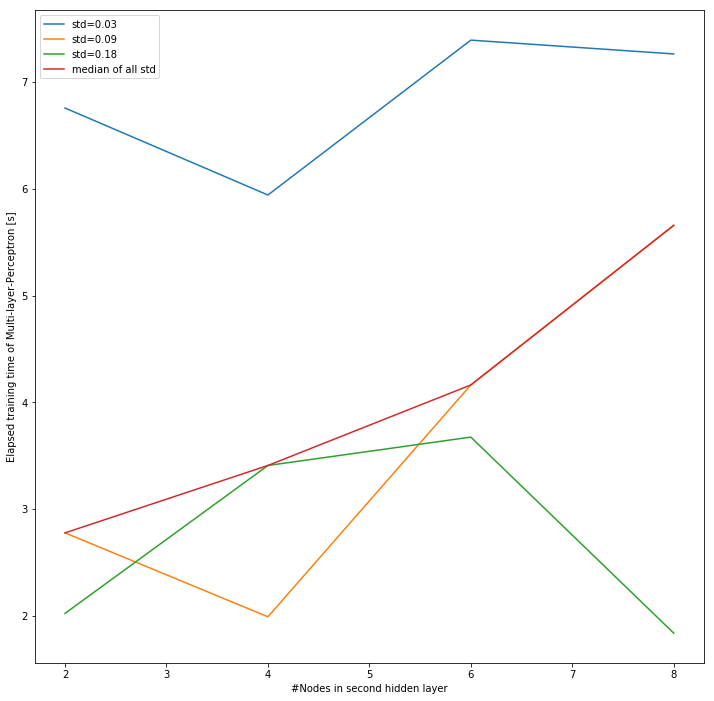

In [66]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

print(elapsed_training_time[8:12])
arr = np.array((np.asarray(elapsed_training_time[:4]),np.asarray(elapsed_training_time[4:8]),np.asarray(elapsed_training_time[8:12])))
print(np.median(arr,0))
ax.plot(np.arange(2,10,2),elapsed_training_time[:4],label='std='+str(sigmas[0]))
ax.plot(np.arange(2,10,2),elapsed_training_time[4:8],label='std='+str(sigmas[1]))
ax.plot(np.arange(2,10,2),elapsed_training_time[8:12],label='std='+str(sigmas[2]))
ax.plot(np.arange(2,10,2),np.median(arr,0),label='median of all std')

ax.set_xlabel('#Nodes in second hidden layer')
ax.set_ylabel('Elapsed training time of Multi-layer-Perceptron [s]')
ax.legend()
plt.savefig('timeplot.png')
plt.show()

Omöjligt att säga något om tiden...